### MODELS IMPLEMENTED - SUPPORT VECTOR MACHINE (SVMs)

### DATA PREPARATION

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv("/content/bank_cleaned_data.csv")
df_svm = df.copy()

df_svm = df_svm.drop(['contact', 'day_of_week', 'month', 'duration', 'pdays', 'previous', 'poutcome'], axis=1)

categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'y']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_svm[col] = le.fit_transform(df_svm[col])
    label_encoders[col] = le

X = df_svm.drop('y', axis=1)
y = df_svm['y']

scaler = StandardScaler()
X[['age', 'balance', 'campaign']] = scaler.fit_transform(X[['age', 'balance', 'campaign']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

df_svm = pd.DataFrame(X, columns = X.columns)
df_svm['y'] = y.values

data_svm_cleaned_path = '/content/data_svm_cleaned.csv'

df_svm.to_csv(data_svm_cleaned_path, index =False)

In [2]:
df_svm.head()

,age,job,marital,education,default,balance,housing,loan,campaign,y
0,1.606965,4,1,2,0,0.256419,1,0,-0.569351,0
1,0.288529,9,2,1,0,-0.437895,1,0,-0.569351,0
2,-0.747384,2,1,1,0,-0.446762,1,1,-0.569351,0
3,0.571051,1,1,1,0,0.047205,1,0,-0.569351,0
4,-0.747384,1,2,1,0,-0.447091,0,0,-0.569351,0


In [3]:
train_set = pd.DataFrame(X_train, columns=X.columns)
train_set['y'] = y_train.values

test_set = pd.DataFrame(X_test, columns=X.columns)
test_set['y'] = y_test.values

train_path = '/content/train_data_svm.csv'
test_path = '/content/test_data_svm.csv'

train_set.to_csv(train_path, index=False)
test_set.to_csv(test_path, index=False)

In [4]:
# Linear SVM
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

linear_svm = svm.SVC(kernel='linear', C=1.0,  class_weight='balanced',random_state=99)
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)

In [5]:
acc_linear = accuracy_score(y_test, y_pred_linear)
cm_linear = confusion_matrix(y_test, y_pred_linear)

In [6]:
print("Linear Kernel SVM")
print(f"Accuracy: {acc_linear:.4f}")
print("Confusion Matrix:\n", cm_linear)

Linear Kernel SVM
Accuracy: 0.5792
Confusion Matrix:
 [[4614 3422]
 [ 383  624]]


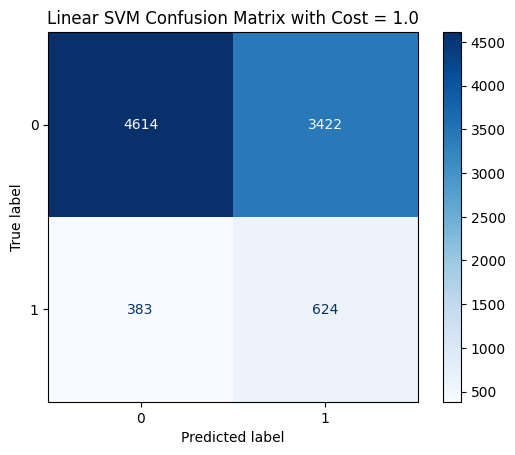

In [7]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_linear)
disp.plot(cmap='Blues')
plt.title('Linear SVM Confusion Matrix with Cost = 1.0')
plt.show()

In [8]:
# Change the cost to 0.1
# Linear SVM

linear_svm2 = svm.SVC(kernel='linear', C=0.1,class_weight='balanced', random_state=99)
linear_svm2.fit(X_train, y_train)
y_pred_linear2 = linear_svm2.predict(X_test)

In [9]:
acc_linear2 = accuracy_score(y_test, y_pred_linear2)
cm_linear2 = confusion_matrix(y_test, y_pred_linear2)

In [10]:
print("Linear Kernel SVM with Cost = 0.1")
print(f"Accuracy: {acc_linear2:.4f}")
print("Confusion Matrix:\n", cm_linear2)

Linear Kernel SVM with Cost = 0.1
Accuracy: 0.5792
Confusion Matrix:
 [[4614 3422]
 [ 383  624]]


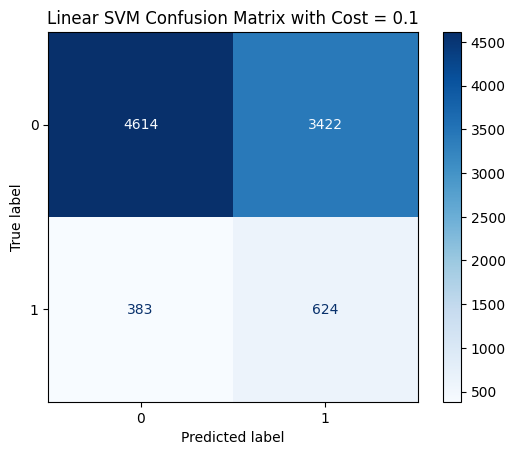

In [11]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_linear2)
disp.plot(cmap='Blues')
plt.title('Linear SVM Confusion Matrix with Cost = 0.1')
plt.show()

In [12]:
# Change the cost to 1.5
# Linear SVM

linear_svm3 = svm.SVC(kernel='linear', C=1.5, class_weight='balanced', random_state=99)
linear_svm3.fit(X_train, y_train)
y_pred_linear3 = linear_svm3.predict(X_test)

In [13]:
acc_linear3 = accuracy_score(y_test, y_pred_linear3)
cm_linear3 = confusion_matrix(y_test, y_pred_linear3)

In [14]:
print("Linear Kernel SVM with Cost = 1.5")
print(f"Accuracy: {acc_linear3:.4f}")
print("Confusion Matrix:\n", cm_linear3)

Linear Kernel SVM with Cost = 1.5
Accuracy: 0.5792
Confusion Matrix:
 [[4614 3422]
 [ 383  624]]


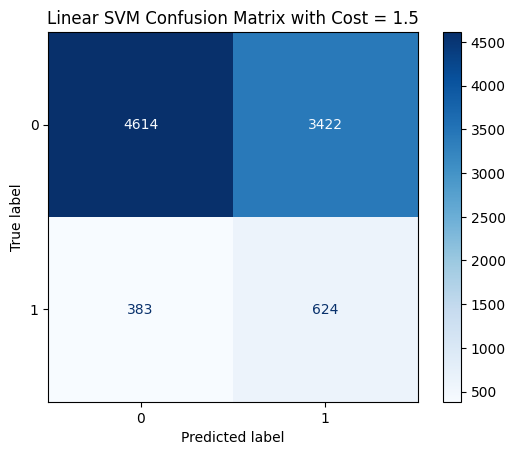

In [15]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_linear3)
disp.plot(cmap='Blues')
plt.title('Linear SVM Confusion Matrix with Cost = 1.5')
plt.show()

In [16]:
# Polynomial SVM (degree = 2)
poly_svm = svm.SVC(kernel='poly', C=1.0, degree=2, class_weight='balanced', random_state=42)
poly_svm.fit(X_train, y_train)
y_pred_poly = poly_svm.predict(X_test)

In [17]:
acc_poly = accuracy_score(y_test, y_pred_poly)
cm_poly = confusion_matrix(y_test, y_pred_poly)

In [18]:
print("Polynomial Kernel SVM (degree=2) with Cost = 1.0")
print(f"Accuracy: {acc_poly:.4f}")
print("Confusion Matrix:\n", cm_poly)

Polynomial Kernel SVM (degree=2) with Cost = 1.0
Accuracy: 0.6917
Confusion Matrix:
 [[5692 2344]
 [ 444  563]]


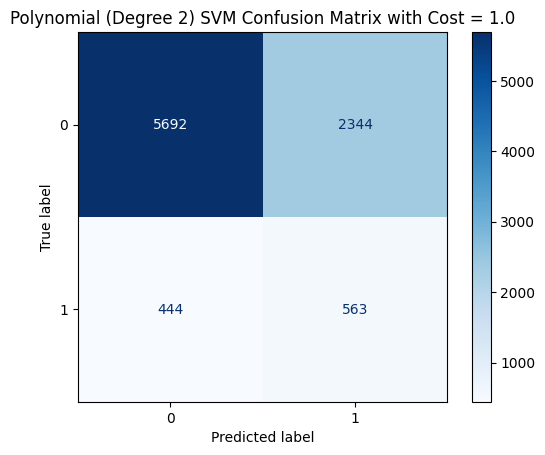

In [19]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_poly)
disp.plot(cmap='Blues')
plt.title('Polynomial (Degree 2) SVM Confusion Matrix with Cost = 1.0')
plt.show()

In [20]:
# Polynomial SVM (degree = 2)
# Change cost to 0.1
poly_svm2 = svm.SVC(kernel='poly', C=0.1, degree=2, class_weight='balanced', random_state=99)
poly_svm2.fit(X_train, y_train)
y_pred_poly2 = poly_svm2.predict(X_test)

In [21]:
acc_poly2 = accuracy_score(y_test, y_pred_poly2)
cm_poly2 = confusion_matrix(y_test, y_pred_poly2)

print("Polynomial Kernel SVM (degree=2) with Cost = 0.1")
print(f"Accuracy: {acc_poly2:.4f}")
print("Confusion Matrix:\n", cm_poly2)

Polynomial Kernel SVM (degree=2) with Cost = 0.1
Accuracy: 0.7227
Confusion Matrix:
 [[6018 2018]
 [ 490  517]]


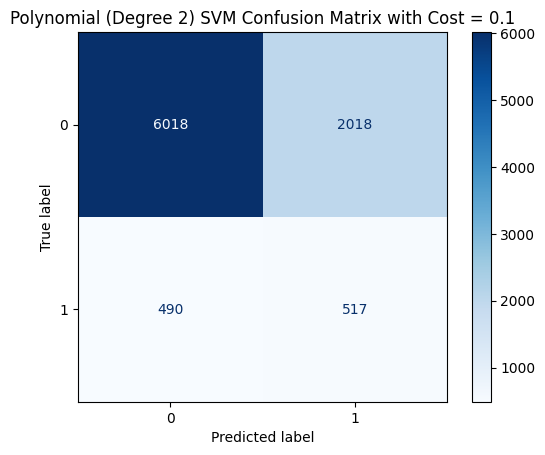

In [22]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_poly2)
disp.plot(cmap='Blues')
plt.title('Polynomial (Degree 2) SVM Confusion Matrix with Cost = 0.1')
plt.show()

In [23]:
# Polynomial SVM (degree = 2)
# Change cost to 1.5
poly_svm3 = svm.SVC(kernel='poly', C=1.5, degree=2, class_weight='balanced', random_state=99)
poly_svm3.fit(X_train, y_train)
y_pred_poly3 = poly_svm3.predict(X_test)

In [24]:
acc_poly3 = accuracy_score(y_test, y_pred_poly3)
cm_poly3 = confusion_matrix(y_test, y_pred_poly3)

print("Polynomial Kernel SVM (degree=2) with Cost = 1.5")
print(f"Accuracy: {acc_poly3:.4f}")
print("Confusion Matrix:\n", cm_poly3)

Polynomial Kernel SVM (degree=2) with Cost = 1.5
Accuracy: 0.6836
Confusion Matrix:
 [[5613 2423]
 [ 438  569]]


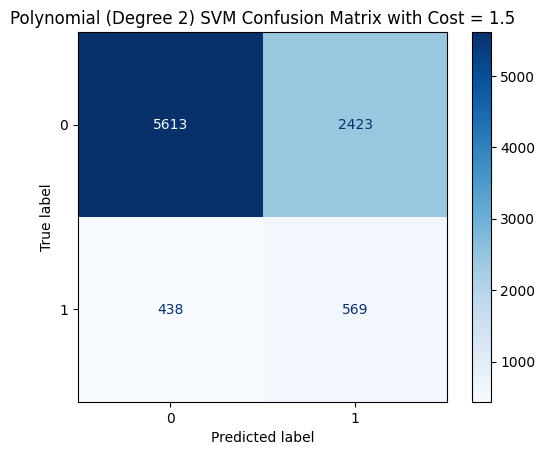

In [25]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_poly3)
disp.plot(cmap='Blues')
plt.title('Polynomial (Degree 2) SVM Confusion Matrix with Cost = 1.5')
plt.show()

In [26]:
# RBF SVM
rbf_svm = svm.SVC(kernel='rbf', C=1.0, class_weight='balanced',random_state=42)
rbf_svm.fit(X_train, y_train)
y_pred_rbf = rbf_svm.predict(X_test)

In [27]:
acc_rbf = accuracy_score(y_test, y_pred_rbf)
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

In [28]:
print("RBF Kernel SVM")
print(f"Accuracy: {acc_rbf:.4f}")
print("Confusion Matrix:\n", cm_rbf)

RBF Kernel SVM
Accuracy: 0.6675
Confusion Matrix:
 [[5458 2578]
 [ 429  578]]


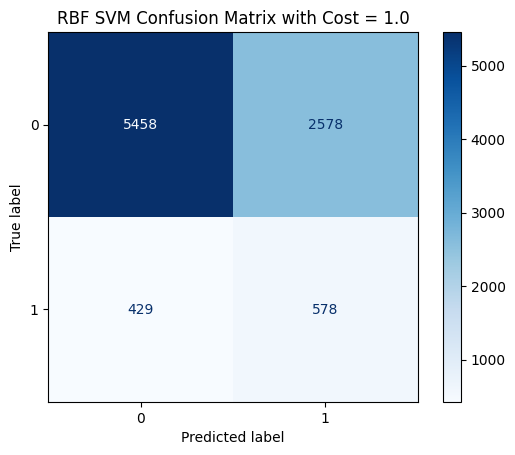

In [29]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rbf)
disp.plot(cmap='Blues')
plt.title('RBF SVM Confusion Matrix with Cost = 1.0')
plt.show()

In [30]:
# RBF SVM
# Change cost = 0.1
rbf_svm2 = svm.SVC(kernel='rbf', C=0.1, class_weight='balanced',random_state=99)
rbf_svm2.fit(X_train, y_train)
y_pred_rbf2 = rbf_svm2.predict(X_test)

In [31]:
acc_rbf2 = accuracy_score(y_test, y_pred_rbf2)
cm_rbf2 = confusion_matrix(y_test, y_pred_rbf2)

print("RBF Kernel SVM")
print(f"Accuracy: {acc_rbf2:.4f}")
print("Confusion Matrix:\n", cm_rbf2)

RBF Kernel SVM
Accuracy: 0.6242
Confusion Matrix:
 [[5034 3002]
 [ 396  611]]


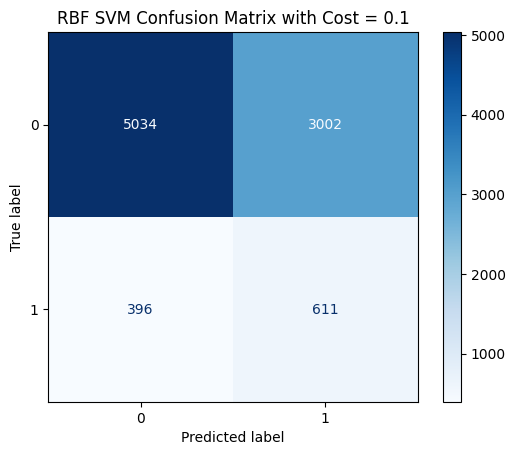

In [32]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rbf2)
disp.plot(cmap='Blues')
plt.title('RBF SVM Confusion Matrix with Cost = 0.1')
plt.show()

In [33]:
# RBF SVM
# Change cost = 1.5
rbf_svm3 = svm.SVC(kernel='rbf', C=1.5, class_weight='balanced',random_state=99)
rbf_svm3.fit(X_train, y_train)
y_pred_rbf3 = rbf_svm3.predict(X_test)

In [34]:
acc_rbf3 = accuracy_score(y_test, y_pred_rbf3)
cm_rbf3 = confusion_matrix(y_test, y_pred_rbf3)

print("RBF Kernel SVM")
print(f"Accuracy: {acc_rbf3:.4f}")
print("Confusion Matrix:\n", cm_rbf3)

RBF Kernel SVM
Accuracy: 0.6774
Confusion Matrix:
 [[5555 2481]
 [ 436  571]]


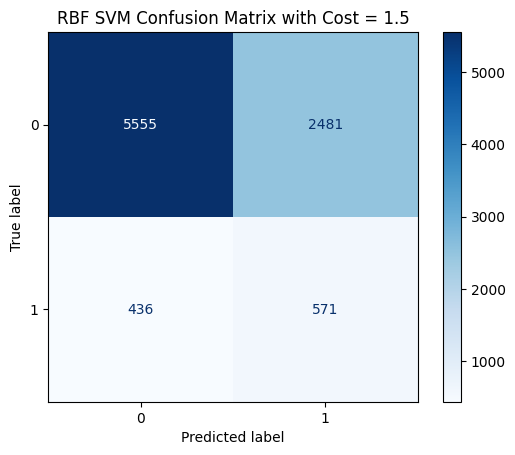

In [35]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rbf3)
disp.plot(cmap='Blues')
plt.title('RBF SVM Confusion Matrix with Cost = 1.5')
plt.show()

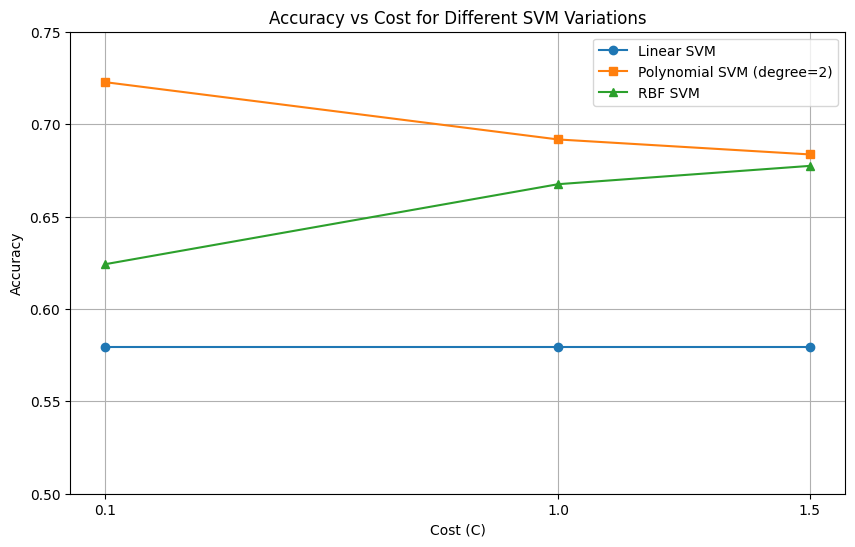

In [36]:
costs = [0.1, 1.0, 1.5]

linear_accuracies = [0.5792, 0.5792, 0.5792]
poly_accuracies = [0.7227, 0.6917, 0.6836]
rbf_accuracies = [0.6242, 0.6675, 0.6774]

plt.figure(figsize=(10,6))
plt.plot(costs, linear_accuracies, marker='o', label='Linear SVM')
plt.plot(costs, poly_accuracies, marker='s', label='Polynomial SVM (degree=2)')
plt.plot(costs, rbf_accuracies, marker='^', label='RBF SVM')

plt.title('Accuracy vs Cost for Different SVM Variations')
plt.xlabel('Cost (C)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.xticks(costs)
plt.ylim(0.5, 0.75)
plt.show()

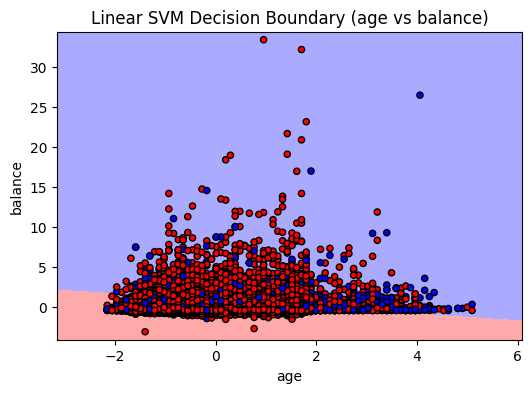

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler

def plot_svm_boundary(X, y, model, features, title):
    h = .02
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6,4))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title(title)
    plt.show()

# 1. (age, balance)
features1 = ['age', 'balance']
X1 = X_train[features1]
y1 = y_train

scaler1 = StandardScaler()
X1_scaled = scaler1.fit_transform(X1)

model1 = SVC(kernel='linear', C=1.0, class_weight='balanced', random_state=42)
model1.fit(X1_scaled, y1)

plot_svm_boundary(X1_scaled, y1, model1, features1, "Linear SVM Decision Boundary (age vs balance)")



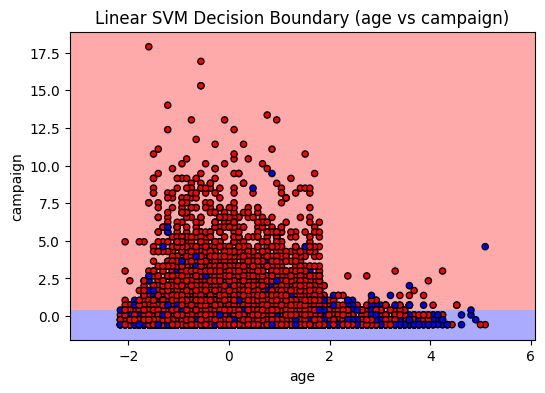

In [38]:
# 2. (age, campaign)
features2 = ['age', 'campaign']
X2 = X_train[features2]
y2 = y_train

scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2)

model2 = SVC(kernel='linear', C=1.0, class_weight='balanced', random_state=99)
model2.fit(X2_scaled, y2)

plot_svm_boundary(X2_scaled, y2, model2, features2, "Linear SVM Decision Boundary (age vs campaign)")


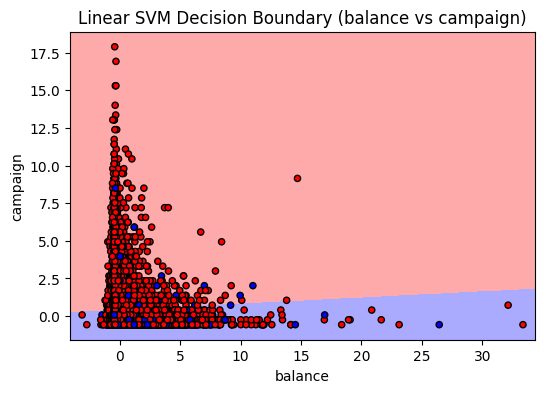

In [39]:

# 3. (balance, campaign)
features3 = ['balance', 'campaign']
X3 = X_train[features3]
y3 = y_train

scaler3 = StandardScaler()
X3_scaled = scaler3.fit_transform(X3)

model3 = SVC(kernel='linear', C=1.0, class_weight='balanced', random_state=99)
model3.fit(X3_scaled, y3)

plot_svm_boundary(X3_scaled, y3, model3, features3, "Linear SVM Decision Boundary (balance vs campaign)")